In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

## Read Data

In [74]:
data=pd.read_csv('https://github.com/thanrada301/Data/raw/main/kidney_disease.csv')
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [75]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [76]:
data.shape

(400, 26)

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

---

## Clean Data

In [78]:
#drop id
data.drop('id',axis=1,inplace=True)

In [79]:
data

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd


In [80]:
#change name of columns

data.columns = ['Age', 'Blood_Pressure', 'Specific_Gravity', 'Albumin',
                'Sugar', 'Red_Blood_Cell', 'Pus_Cell', 'Pus_Cell_Clumps',
                'Bacteria', 'Blood_Glucose_Random', 'Blood_Urea', 'Serum_Creatinine',
                'Sodium', 'Potassium', 'Haemoglobin', 'Packed_Cell_Volume', 'White_Blood_Cell_Count',
                'Red_Blood_Cell_Count', 'Hypertension', 'Diabetes_Mellitus', 'Coronary_Artery_Disease',
                'Appetite', 'Pedal_Edema', 'Anemia', 'Class']


In [81]:
data.head()

,Age,Blood_Pressure,Specific_Gravity,Albumin,Sugar,Red_Blood_Cell,Pus_Cell,Pus_Cell_Clumps,Bacteria,Blood_Glucose_Random,Blood_Urea,Serum_Creatinine,Sodium,Potassium,Haemoglobin,Packed_Cell_Volume,White_Blood_Cell_Count,Red_Blood_Cell_Count,Hypertension,Diabetes_Mellitus,Coronary_Artery_Disease,Appetite,Pedal_Edema,Anemia,Class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      391 non-null    float64
 1   Blood_Pressure           388 non-null    float64
 2   Specific_Gravity         353 non-null    float64
 3   Albumin                  354 non-null    float64
 4   Sugar                    351 non-null    float64
 5   Red_Blood_Cell           248 non-null    object 
 6   Pus_Cell                 335 non-null    object 
 7   Pus_Cell_Clumps          396 non-null    object 
 8   Bacteria                 396 non-null    object 
 9   Blood_Glucose_Random     356 non-null    float64
 10  Blood_Urea               381 non-null    float64
 11  Serum_Creatinine         383 non-null    float64
 12  Sodium                   313 non-null    float64
 13  Potassium                312 non-null    float64
 14  Haemoglobin              3

In [83]:
data.describe()

,Age,Blood_Pressure,Specific_Gravity,Albumin,Sugar,Blood_Glucose_Random,Blood_Urea,Serum_Creatinine,Sodium,Potassium,Haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [84]:
#convert Packed_Cell_Volume,White_Blood_Cell_Count,Red_Blood_Cell_Count -> Numeric

data['Packed_Cell_Volume'] = pd.to_numeric(data['Packed_Cell_Volume'], errors='coerce')
data['White_Blood_Cell_Count'] = pd.to_numeric(data['White_Blood_Cell_Count'], errors='coerce')
data['Red_Blood_Cell_Count'] = pd.to_numeric(data['Red_Blood_Cell_Count'], errors='coerce')

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      391 non-null    float64
 1   Blood_Pressure           388 non-null    float64
 2   Specific_Gravity         353 non-null    float64
 3   Albumin                  354 non-null    float64
 4   Sugar                    351 non-null    float64
 5   Red_Blood_Cell           248 non-null    object 
 6   Pus_Cell                 335 non-null    object 
 7   Pus_Cell_Clumps          396 non-null    object 
 8   Bacteria                 396 non-null    object 
 9   Blood_Glucose_Random     356 non-null    float64
 10  Blood_Urea               381 non-null    float64
 11  Serum_Creatinine         383 non-null    float64
 12  Sodium                   313 non-null    float64
 13  Potassium                312 non-null    float64
 14  Haemoglobin              3

In [86]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f'Unique values in column "{column}" :{unique_values}')

Unique values in column "Age" :[48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
Unique values in column "Blood_Pressure" :[ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
Unique values in column "Specific_Gravity" :[1.02  1.01  1.005 1.015   nan 1.025]
Unique values in column "Albumin" :[ 1.  4.  2.  3.  0. nan  5.]
Unique values in column "Sugar" :[ 0.  3.  4.  1. nan  2.  5.]
Unique values in column "Red_Blood_Cell" :[nan 'normal' 'abnormal']
Unique values in column "Pus_Cell" :['normal' 'abnormal' nan]
Unique values in column "Pus_Cell_Clumps" :['notpresent' 'present' nan]
Unique values in column "Bacteria" :['notpresent' 'present' nan]
Unique values in column "Blood_Glucose_Random" :[121.  nan 423. 117. 106.  74. 

In [87]:
# Unique values in column "Diabetes_Mellitus": ['yes' 'no' ' yes' '\tno' '\tyes' nan]
replacements = {' yes':'yes','\tno':'no','\tyes':'yes'}

for pattern,replacement in replacements.items():
    data['Diabetes_Mellitus']=data['Diabetes_Mellitus'].str.replace(pattern,replacement)

data['Diabetes_Mellitus'].unique()

array(['yes', 'no', nan], dtype=object)

In [88]:
# Unique values in column "Coronary_Artery_Disease": ['no' 'yes' '\tno' nan]
data['Coronary_Artery_Disease']=data['Coronary_Artery_Disease'].str.replace('\tno','no')
data['Coronary_Artery_Disease'].unique()

array(['no', 'yes', nan], dtype=object)

In [89]:
# Unique values in column "Class": ['ckd' 'ckd\t' 'notckd']
data['Class']=data['Class'].str.replace('ckd\t','ckd')
data['Class'].unique()

array(['ckd', 'notckd'], dtype=object)

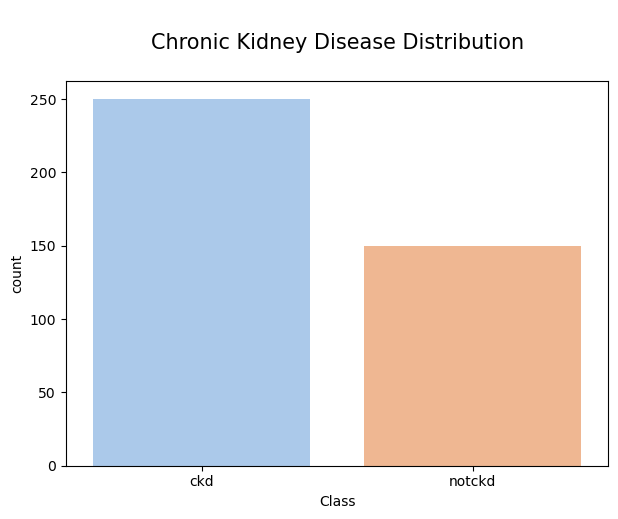

In [90]:
plt.figure(figsize=(7,5))
sns.countplot(data=data, x="Class",palette='pastel')
plt.title("\nChronic Kidney Disease Distribution\n", fontsize=15)
plt.show();

In [91]:
data['Class']=data['Class'].map({'ckd':'0','notckd':'1'})
data['Class']=pd.to_numeric(data['Class'],errors = 'coerce')

In [92]:
data.isnull().sum()

Age                          9
Blood_Pressure              12
Specific_Gravity            47
Albumin                     46
Sugar                       49
Red_Blood_Cell             152
Pus_Cell                    65
Pus_Cell_Clumps              4
Bacteria                     4
Blood_Glucose_Random        44
Blood_Urea                  19
Serum_Creatinine            17
Sodium                      87
Potassium                   88
Haemoglobin                 52
Packed_Cell_Volume          71
White_Blood_Cell_Count     106
Red_Blood_Cell_Count       131
Hypertension                 2
Diabetes_Mellitus            2
Coronary_Artery_Disease      2
Appetite                     1
Pedal_Edema                  1
Anemia                       1
Class                        0
dtype: int64

In [93]:
data.describe()

,Age,Blood_Pressure,Specific_Gravity,Albumin,Sugar,Blood_Glucose_Random,Blood_Urea,Serum_Creatinine,Sodium,Potassium,Haemoglobin,Packed_Cell_Volume,White_Blood_Cell_Count,Red_Blood_Cell_Count,Class
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000,400.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435,0.375000
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000,0.000000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000,0.000000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000,0.000000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000,1.000000


In [94]:
for i in ['Age','Blood_Pressure','Specific_Gravity','Albumin','Sugar','Blood_Glucose_Random',
          'Blood_Urea','Serum_Creatinine','Sodium','Potassium','Haemoglobin','Packed_Cell_Volume',
          'White_Blood_Cell_Count','Red_Blood_Cell_Count']:
    data[i].fillna(data[i].mean(),inplace=True)

In [95]:
data.isnull().sum()

Age                          0
Blood_Pressure               0
Specific_Gravity             0
Albumin                      0
Sugar                        0
Red_Blood_Cell             152
Pus_Cell                    65
Pus_Cell_Clumps              4
Bacteria                     4
Blood_Glucose_Random         0
Blood_Urea                   0
Serum_Creatinine             0
Sodium                       0
Potassium                    0
Haemoglobin                  0
Packed_Cell_Volume           0
White_Blood_Cell_Count       0
Red_Blood_Cell_Count         0
Hypertension                 2
Diabetes_Mellitus            2
Coronary_Artery_Disease      2
Appetite                     1
Pedal_Edema                  1
Anemia                       1
Class                        0
dtype: int64

In [96]:
#replace null strings with the most common string in each column
for col in data.columns:
    most_common_string = data[col].mode()[0] 
    data[col].fillna(most_common_string, inplace=True)

In [97]:
data.isnull().sum()

Age                        0
Blood_Pressure             0
Specific_Gravity           0
Albumin                    0
Sugar                      0
Red_Blood_Cell             0
Pus_Cell                   0
Pus_Cell_Clumps            0
Bacteria                   0
Blood_Glucose_Random       0
Blood_Urea                 0
Serum_Creatinine           0
Sodium                     0
Potassium                  0
Haemoglobin                0
Packed_Cell_Volume         0
White_Blood_Cell_Count     0
Red_Blood_Cell_Count       0
Hypertension               0
Diabetes_Mellitus          0
Coronary_Artery_Disease    0
Appetite                   0
Pedal_Edema                0
Anemia                     0
Class                      0
dtype: int64

In [98]:
data.head()

,Age,Blood_Pressure,Specific_Gravity,Albumin,Sugar,Red_Blood_Cell,Pus_Cell,Pus_Cell_Clumps,Bacteria,Blood_Glucose_Random,Blood_Urea,Serum_Creatinine,Sodium,Potassium,Haemoglobin,Packed_Cell_Volume,White_Blood_Cell_Count,Red_Blood_Cell_Count,Hypertension,Diabetes_Mellitus,Coronary_Artery_Disease,Appetite,Pedal_Edema,Anemia,Class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200000,yes,yes,no,good,no,no,0
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.707435,no,no,no,good,no,no,0
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,0
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600000,no,no,no,good,no,no,0


In [99]:
pd.set_option('display.max_columns', None)

In [100]:
data

,Age,Blood_Pressure,Specific_Gravity,Albumin,Sugar,Red_Blood_Cell,Pus_Cell,Pus_Cell_Clumps,Bacteria,Blood_Glucose_Random,Blood_Urea,Serum_Creatinine,Sodium,Potassium,Haemoglobin,Packed_Cell_Volume,White_Blood_Cell_Count,Red_Blood_Cell_Count,Hypertension,Diabetes_Mellitus,Coronary_Artery_Disease,Appetite,Pedal_Edema,Anemia,Class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200000,yes,yes,no,good,no,no,0
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.707435,no,no,no,good,no,no,0
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,0
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600000,no,no,no,good,no,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.000000,49.0,0.5,150.000000,4.900000,15.7,47.0,6700.0,4.900000,no,no,no,good,no,no,1
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.000000,31.0,1.2,141.000000,3.500000,16.5,54.0,7800.0,6.200000,no,no,no,good,no,no,1
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.000000,26.0,0.6,137.000000,4.400000,15.8,49.0,6600.0,5.400000,no,no,no,good,no,no,1
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.000000,50.0,1.0,135.000000,4.900000,14.2,51.0,7200.0,5.900000,no,no,no,good,no,no,1


In [101]:
columns_to_dummify = ['Red_Blood_Cell', 'Pus_Cell', 'Pus_Cell_Clumps',
                      'Bacteria','Hypertension','Diabetes_Mellitus',
                      'Coronary_Artery_Disease','Appetite','Pedal_Edema','Anemia']
dummies = pd.get_dummies(data[columns_to_dummify], dtype=int)

# Concatenate the dummy variables with the original DataFrame
data = pd.concat([data, dummies], axis=1)

# Drop the original columns
data.drop(columns_to_dummify, axis=1, inplace=True)

In [102]:
data

,Age,Blood_Pressure,Specific_Gravity,Albumin,Sugar,Blood_Glucose_Random,Blood_Urea,Serum_Creatinine,Sodium,Potassium,Haemoglobin,Packed_Cell_Volume,White_Blood_Cell_Count,Red_Blood_Cell_Count,Class,Red_Blood_Cell_abnormal,Red_Blood_Cell_normal,Pus_Cell_abnormal,Pus_Cell_normal,Pus_Cell_Clumps_notpresent,Pus_Cell_Clumps_present,Bacteria_notpresent,Bacteria_present,Hypertension_no,Hypertension_yes,Diabetes_Mellitus_no,Diabetes_Mellitus_yes,Coronary_Artery_Disease_no,Coronary_Artery_Disease_yes,Appetite_good,Appetite_poor,Pedal_Edema_no,Pedal_Edema_yes,Anemia_no,Anemia_yes
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200000,0,0,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
1,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.707435,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,4.707435,0,0,1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,1,0,0,1
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000,0,0,1,1,0,0,1,1,0,0,1,1,0,1,0,0,1,0,1,0,1
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600000,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.000000,49.0,0.5,150.000000,4.900000,15.7,47.0,6700.0,4.900000,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
396,42.0,70.0,1.025,0.0,0.0,75.000000,31.0,1.2,141.000000,3.500000,16.5,54.0,7800.0,6.200000,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
397,12.0,80.0,1.020,0.0,0.0,100.000000,26.0,0.6,137.000000,4.400000,15.8,49.0,6600.0,5.400000,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
398,17.0,60.0,1.025,0.0,0.0,114.000000,50.0,1.0,135.000000,4.900000,14.2,51.0,7200.0,5.900000,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


---

## Model

### 1.KNN Model

In [171]:
x=data.drop('Class',axis=1).values
y=data['Class'].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

test score = 83.33333333333334
test score = 75.0
test score = 85.0
test score = 75.0
test score = 72.5
test score = 73.33333333333333
test score = 77.5
test score = 75.0


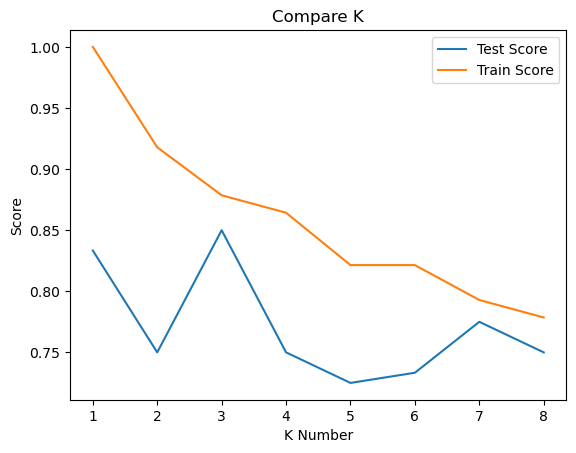

In [172]:
#find K for model
k_neighbors=np.arange(1,9)
train_score = np.empty(len(k_neighbors)) 
test_score =np.empty(len(k_neighbors)) 

for i,k in enumerate(k_neighbors):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    
    train_score[i]=knn.score(x_train,y_train)
    test_score[i]=knn.score(x_test,y_test)
    
    print('test score =' ,test_score[i]*100)
    
    
plt.title('Compare K')
plt.plot(k_neighbors,test_score,label='Test Score')
plt.plot(k_neighbors,train_score,label='Train Score')
plt.legend()
plt.xlabel('K Number')
plt.ylabel('Score')
plt.show()

In [173]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [174]:
#predict
y_pred=knn.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.78      0.86        72
           1       0.74      0.96      0.84        48

    accuracy                           0.85       120
   macro avg       0.85      0.87      0.85       120
weighted avg       0.88      0.85      0.85       120



In [175]:
print(pd.crosstab(y_test, y_pred, rownames=['Accuracy'], colnames=['Prediction'], margins=True))

Prediction   0   1  All
Accuracy               
0           56  16   72
1            2  46   48
All         58  62  120


In [186]:
knn = accuracy_score(y_test,y_pred)
print('Accuracy = ',accuracy_score(y_test,y_pred)*100)

Accuracy =  85.0


### 2.Naive_bayes

In [177]:
x_1,x_2,y_1,y_2=train_test_split(x,y,random_state=0)

In [178]:
#model
model = GaussianNB()
model.fit(x_1,y_1)

GaussianNB()

In [179]:
#prediction
yn_pred=model.predict(x_2)

In [188]:
nvb=accuracy_score(y_2,yn_pred)
print('Accuracy = ',accuracy_score(y_2,yn_pred)*100)

Accuracy =  97.0


### 3.Decision Tree

In [181]:
x1, x2, y1, y2 = train_test_split(x, y, test_size=0.3, random_state=0)

In [182]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(x1, y1)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [183]:
yt_pred = clf.predict(x2)

In [187]:
dct=accuracy_score(y2,yt_pred)
print('Accuracy = ', accuracy_score(y2,yt_pred)*100)

Accuracy =  99.16666666666667


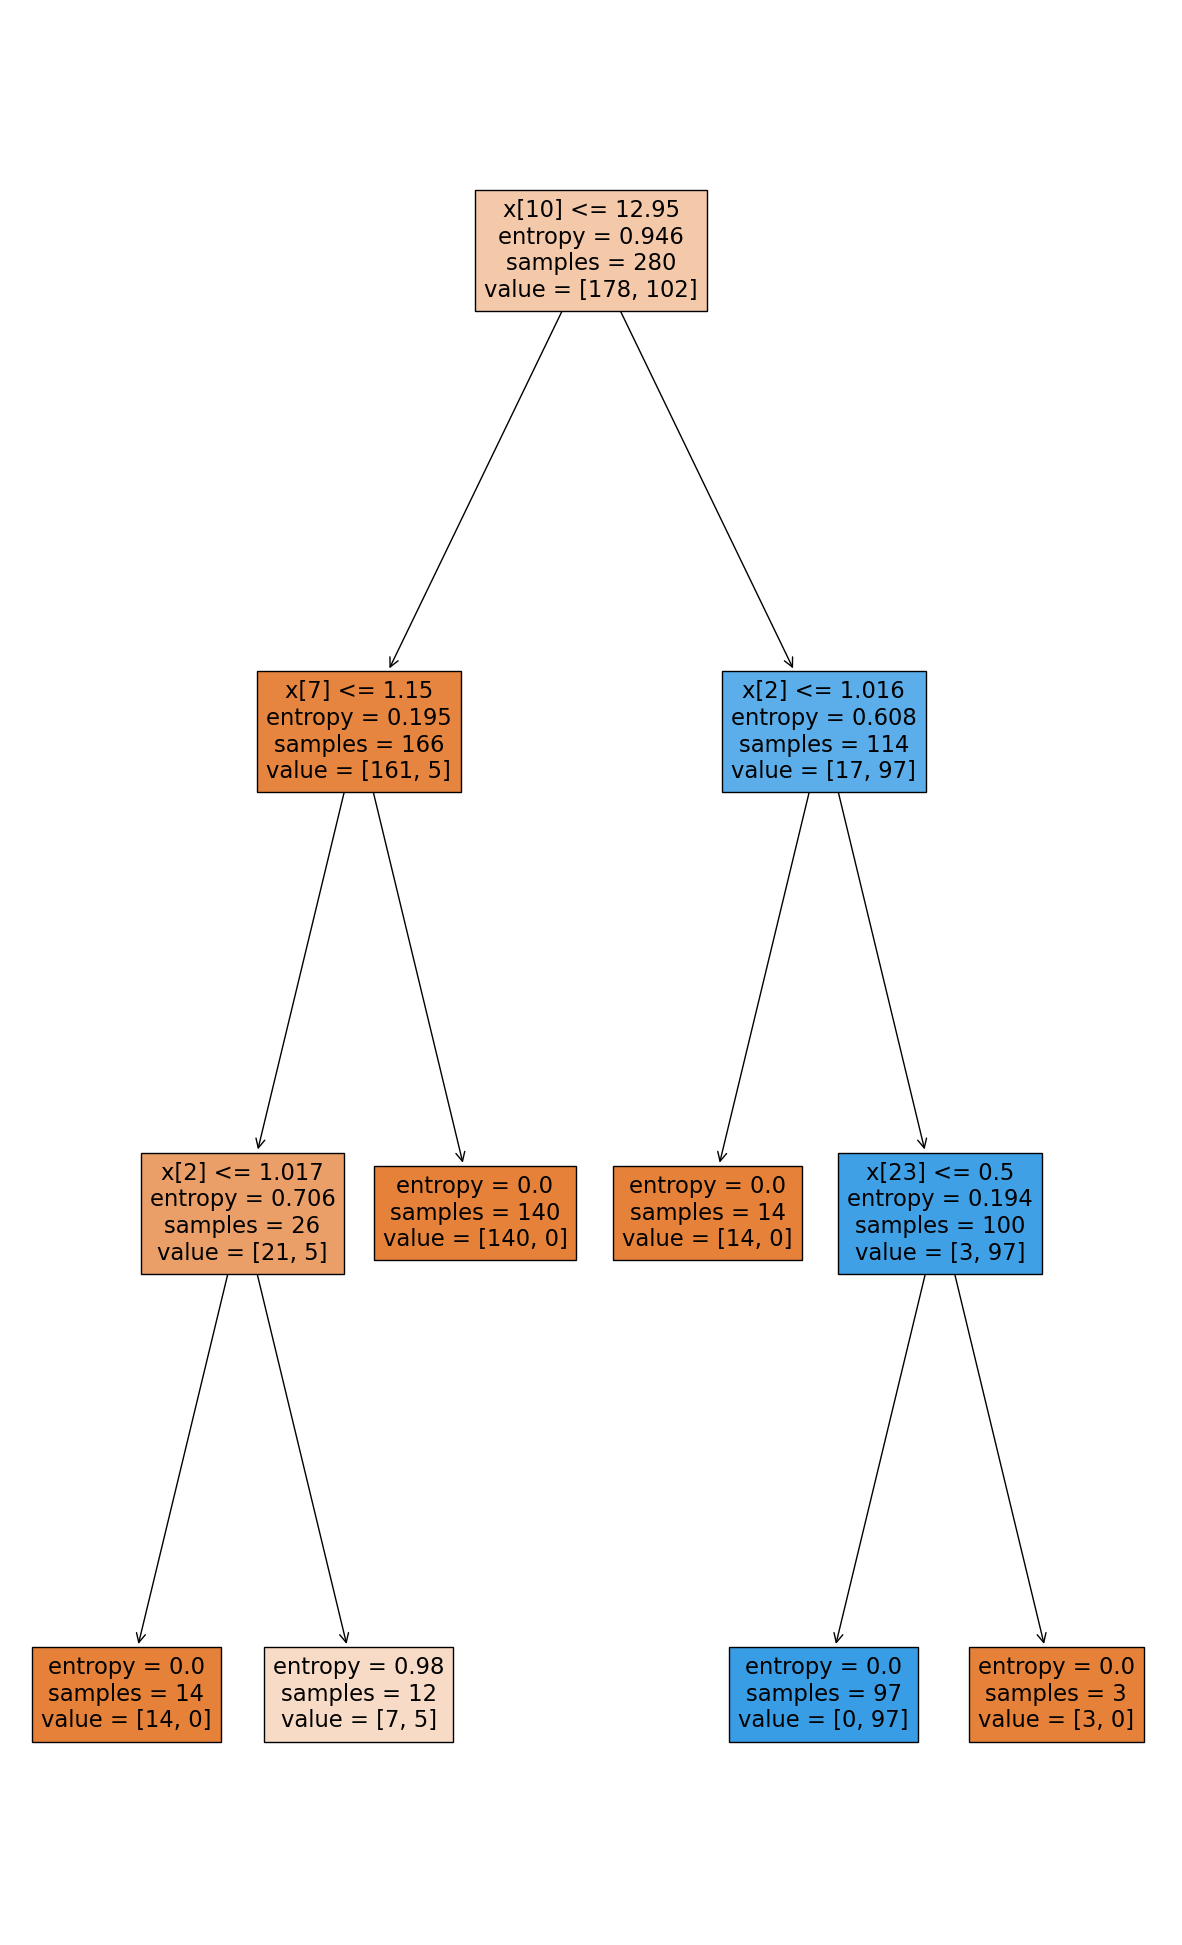

In [185]:
plt.figure(figsize=(15,25))
plot_tree(clf,filled=True);

In [193]:
models = pd.DataFrame({
    'Model': ['KNN', 'Naive Bayes classifier', 'Decision Tree Classifier'],
    'Score': [knn, nvb, dct]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,Decision Tree Classifier,0.991667
1,Naive Bayes classifier,0.970000
0,KNN,0.850000


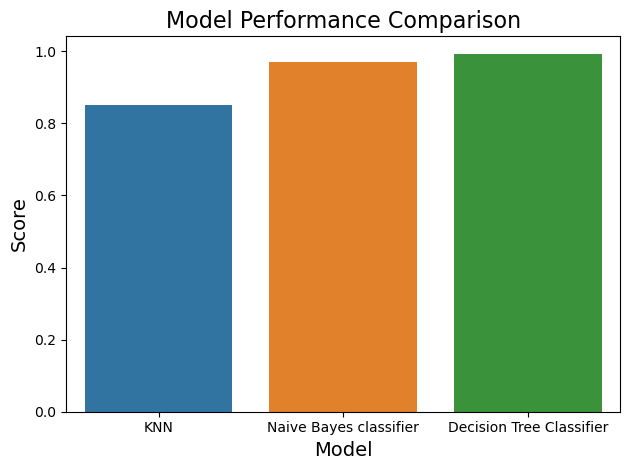

In [203]:
sns.barplot(x='Model', y='Score', data=models)
sns.color_palette("Set2")

plt.xlabel('Model', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title('Model Performance Comparison', fontsize=16)
plt.xticks(rotation=0)  
plt.tight_layout()
plt.show()